<a href="https://colab.research.google.com/github/YMGYM/xai_wikibooks_study/blob/main/wikibooks_xai_bookch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 의사 결정 트리

- 의사결정 트리(Decision Tree)는 질문을 던지고 답을 하는 과정을 연쇄적으로 반복해서 집단의 분류, 예측을 하는 분석 방법
- 일반적으로 정보 이득 수치(정보 엔트로피)를 계산해서 최적 목표를 달성하는 트리를 완성한다. 

$ Entropy(A) = -\Sigma^{k=1}_{n} p_klog_2(p_k)$

- n : 범주 개수
- pk : A영역에 속하는 레코드 가운데 k 범주에 속하는 레코드의 비율
- log(1) == 0 이므로, 무질서도가 낮다 => 정보가 잘 정리되어 있다.
- 최소한의 행동으로 최대한의 엔트로피 손실을 발생시키기 위해 알고리즘을 동작한다. (재귀적 분기)
- 의사 결정 트리가 모든 학습 데이터에 대해 분기한 상태를 Full tree 라고 한다. => 오버피팅 문제가 발생할 여지가 크다
- 오버피팅을 막기 위해 특정 임계점보다 낮은 수준의 정보 이득이 발생하는 가지를 쳐내는 과정이 필요하다 => pruning

## 4-1 의사 결정 트리 시각화
- 의사 결정 트리를 시각화할 수 있다면, 사용자가 이를 따라 데이터를 분류하기만 해도 컴퓨터와 같은 결과를 얻을 수 있들 것

## 4-2 피처 중요도 구하기
- 피처 중요도(퍼뮤테이션 중요도)는 데이터의 피처가 알고리즘의 정확한 분류에 얼마나 큰 영향을 미치는지 분석하는 기법
- 특정 피처의 값을 임의의 값으로 치환했을 때 원래 데이터보다 예측 에러가 얼마나 더 커지는가를 측정하는 방법 (예측 오류가 많이 커지면 여기에 의존해서 추론하는 것)
- 2001년에 이런 개념을 근간으로 퍼뮤테이션 피처 중요도라는 개념이 등장했다.
- 이 개념을 응용해서 Model Agnositc한 기법을 제안 (피셔, 루딘, 도미니치)

1. 주어진 모델의 에러를 측정한다. $ e^{original} = L(y, f) $
2. X의 피처 k개(k = 1, ..., p)에 대하여
  1. 피처 매트릭스 $ X^{permutaiton} $ 을 만든다. 피처 k를 매트릭스 x에서 임의의 값으로 변경한 모델
  2.  $ X^{permutaiton} $으로 모델 에러를 측정한다. $ e^{permutation} = L(y, f(X^{permutaiton})) $
  3. 퍼뮤테이션 피처 중요도를 산정한다. $FI^k = \frac{e^{permutation}}{e^{original}}$ . 또는 차이를 이용할 수도 있다. $e^{permutation} - e^{original}$
3. $FI$ 를 구한다.

- 이 알고리즘에서 2-1에서의 값은 $(n-1)x(n)$ 번 비교하기 때문에 오래 걸린다. 
- 논문에서 휴리스틱한 모델 의존성 개산 방법을 제안한다. $ \frac{nxn}{4} $ 의 계산 비용 소모
- 하지만 휴리스틱한 방법은 정확성이 떨어진다는 단점이 있음


## 4-3 부분 의존성 플롯(PDP) 그리기

- 피처의 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증가하고 감소하는지를 관찰하는 방식
- 피처의 값이 변할 때 모델에 미치는 영향을 가시적으로 이해할 수 있다.
- 부분 의존성 함수는 다음과 같이 정의된다.

$ \hat{f}_{xs}(x_s) = E_{xc}[\hat{f}(x_s, x_c)] = \int \hat{f}(x_s, x_c)dP(x_c) $

- $x_s$ : 부분 의존성 함수가 시각화 해야 할 피처 (하나 또는 두 개의 피처로 구성된 S 집합)
- $x_c$ : 머신 러닝 모델이 사용하는 피처
- 이 함수를 통해 원소 s와 전체 모델 사이의 예측 결과값의 차이를 알 수 있고, 이게 부분 의존성 수치

이는 몬테카를로 방식을 통해 근사할 수 있다.

$ \hat{f_{xs}}(x_s) = \frac{1}{n}\sum_{i=1}^{n}\hat{f}(x_s, x^i_c) $

- $x_s$는 관심 있는 피처
- $x^i_c$ 는 관심 없는 피처의 집합


## 4-4 XGBoost 활용하기

- 캐글 대회에서 우승자들은 종종 XGBoost를 사용해 우승한다.

### XGBoost 의 장점
- 병렬 처리를 사용해 학습과 분류가 빠르다
- 유연성이 좋다 (다양한 커스텀 최적화 옵션 제공)
- 그리디 알고리즘으로 가지를 친다. (과적합이 잘 일어나지 않는다.)
- 연계 활용성이 좋다. (앙상블 학습이 쉽다)

### XGBoost 는 딥러닝이 아니다.

- 상대적으로 저차원의 데이터 처리 문제를 해결하기 위해서는 딥러닝보단 다른 머신러닝 모델이 적합하다.
- XGBoost는 높은 연산 처리 능력이 없어도 실행할 수 있다.

### 기본 원리
- 기본적으로 부스팅 (약한 분류기를 많이 엮어 정확도 예측)
- $Y = \alpha M(X) + \beta G(X) + \gamma H(X) + error_4 $
- 각 비중 (알파, 베타, 감마)는 머신 러닝을 통해 찾는다.
- M, G, H는 각각의 분류기이며, 분류기가 많아질수록 분류 오차는 줄어들 것이다.
- 각각의 분류기를 나무, 최종 알고리즘을 숲이라고 한다.
- XGBoost 는 CART알고리즘을 사용해 트리를 만든다(각각의 리프가 모델의 최종 가치와 수치적으로 연결되어 있다.)


## 4-5 실습1 : 피마 인디언 당뇨병 결정 모델

In [15]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

In [21]:
# 데이터 로드
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/pima-indians-diabetes.csv')
dataset = dataset.to_numpy()

In [22]:
X = dataset[:, 0:8]
y = dataset[:, 8] # 8번째 행이 output 값이다.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
# 학습 데이터로 모델 학습시키기
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [26]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100.0:.2f}")

Accuracy: 73.38


In [27]:
# 임의의 데이터로 예측해보기
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

l = model.predict_proba(value)
print(f"No diabetes: {l[0][0]:0.2f}\nYes diabetes: {l[0][1]:0.2f}")

No diabetes: 0.68
Yes diabetes: 0.32


- 이와 같은 과정 에서는 피처 우선순위, 피처에 따른 수치 변화 등을 설명할 수 없다.
- 이런 상황에서 일반인은 모델을 신뢰하기 어려울 것이다.

### 4-5-2 설명 가능한 모델 결합하기

- 머신러닝 모델에 XAI 기법을 응용해 해석을 가능케 해보자.

#### 의사 결정 트리 시각화

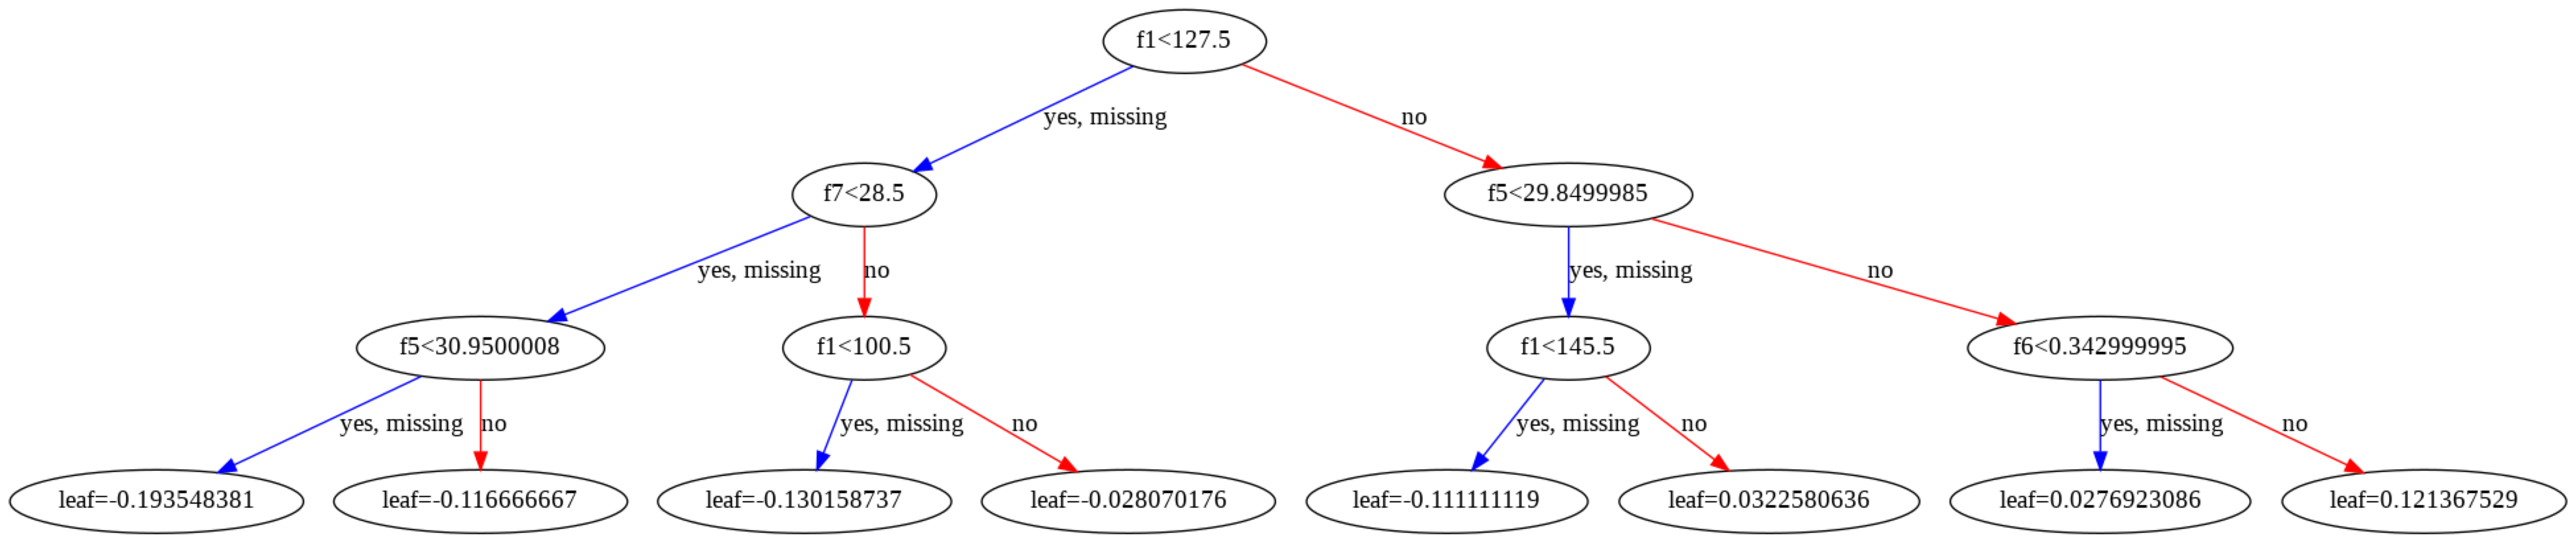

In [28]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 100, 200

# 트리 시각화
plot_tree(model)
plt.show()

numpy의 문제로 인해 feature 이름들을 읽어올 수 없었지만, 앞 순서대로 feature 가 0번부터 나갈 것을 확인할 수 있다.

주어진 데이터 `[1, 161, 72, 35, 0, 28.1, 0.527, 20]` 를 가지고 확인해 보면

- Glucose(f1)가 맨 위에 있으므로 이 부분을 분류했을때 정보 이득량이 가장 많다는 것을 시사한다.
- 주어진 분류방법을 따르면 no - yes - no 순으로 이동한다.
- leaf값은 로지스틱 함수의 x값이며, 이를 확률로 표시하면.. 0.68이 나온다.

In [31]:
# 다음 방법으로 가지를 푸르닝 하거나(가지치기), 가지를 추가할 수 있다.
model = XGBClassifier(max_depth=2) # 프루닝
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

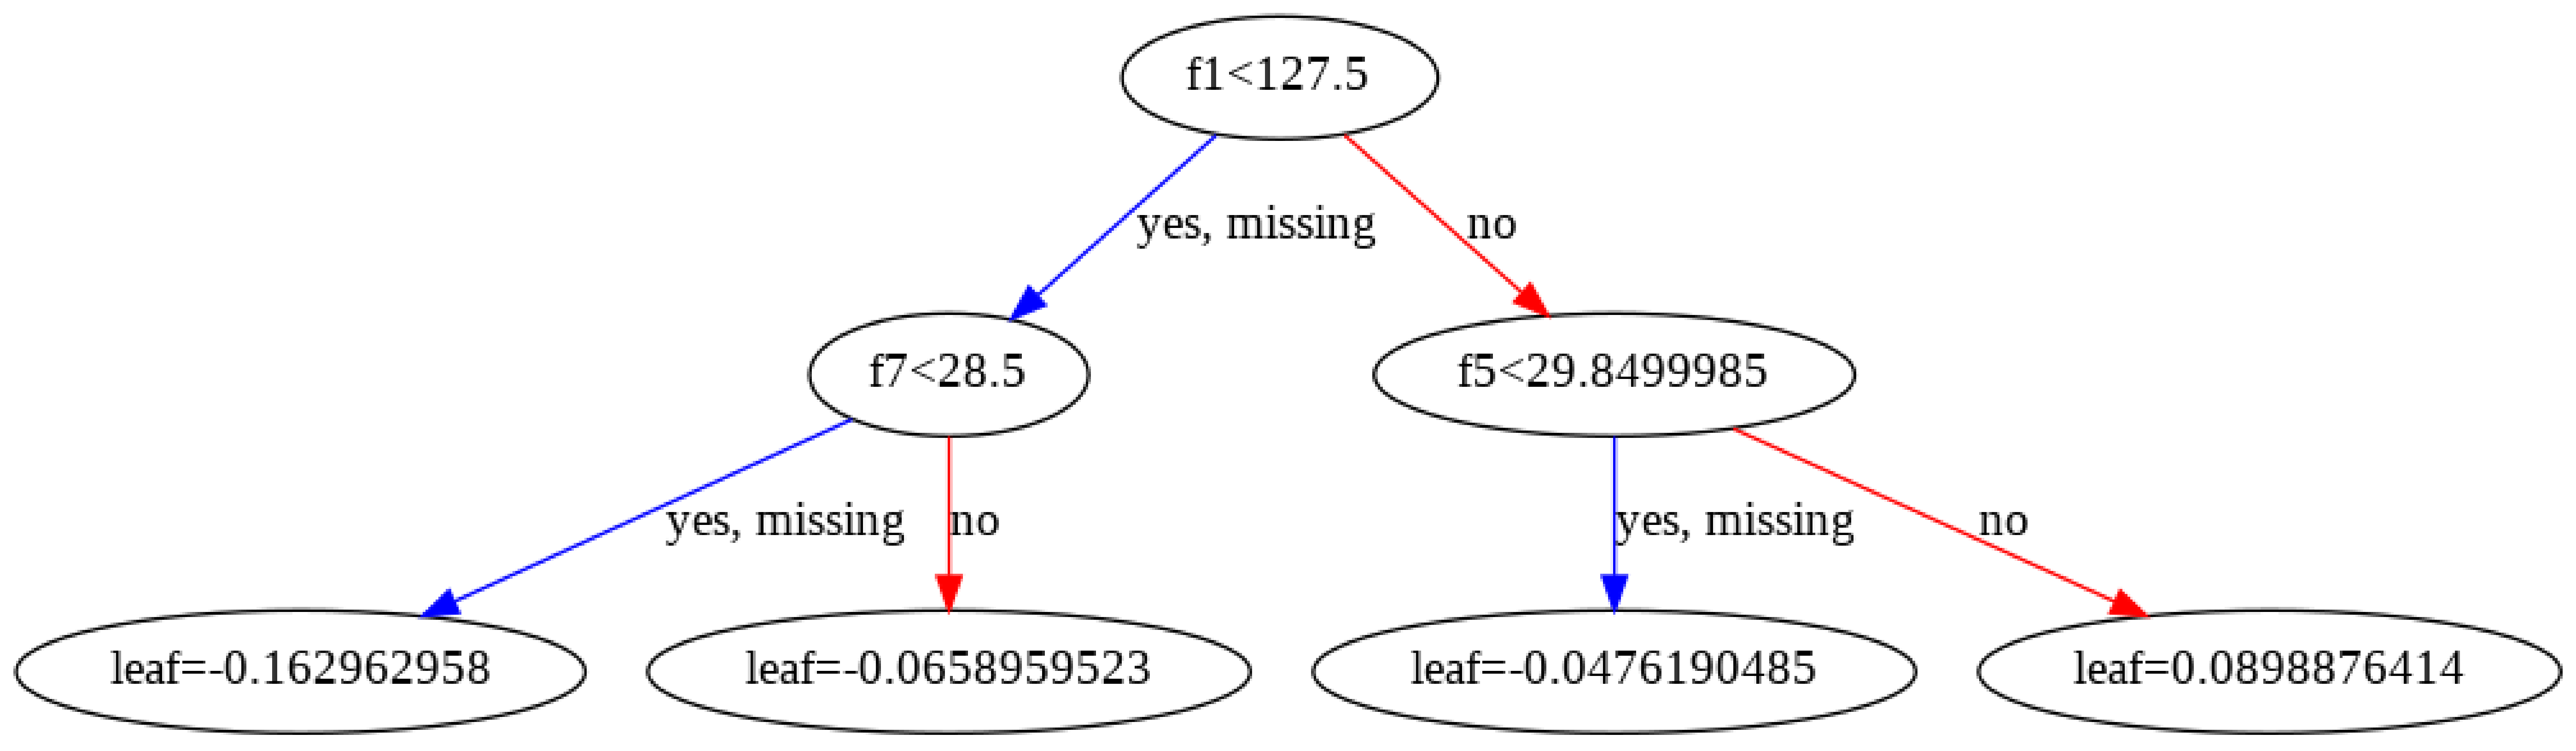

In [32]:
plot_tree(model)
plt.show()

#### 피처 중요도 구분하기
- 피셔, 루딘, 도미니치의 방법을 사용한다.
- 특정 피처를 한 번씩 순회하면서 무작위 모델을 만들고 에러를 측정하는 방식
- 피처간 연관성이 적을 때 효과적이다.

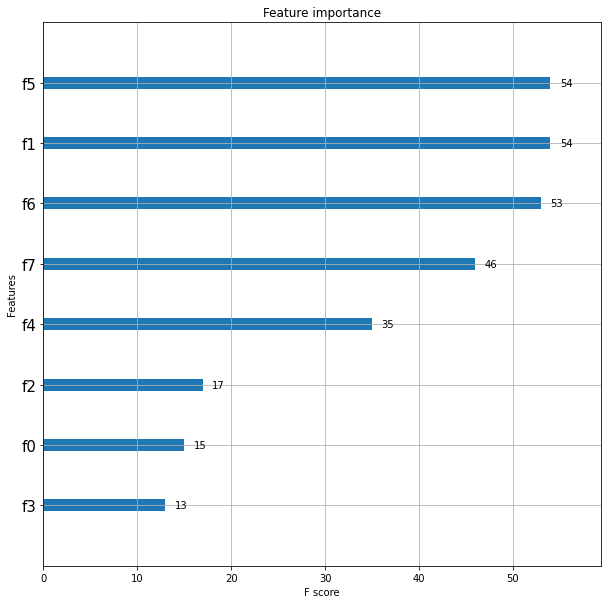

In [34]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

- f1(Glucose)가 높게 나타났다
- 트리의 순서와 꼭 일치해야하는 것은 아니다(트리는 정보 이득량, 피처 중요도는 에러율로 계산)
- 하지만 대부분 일치하게 나타난다.

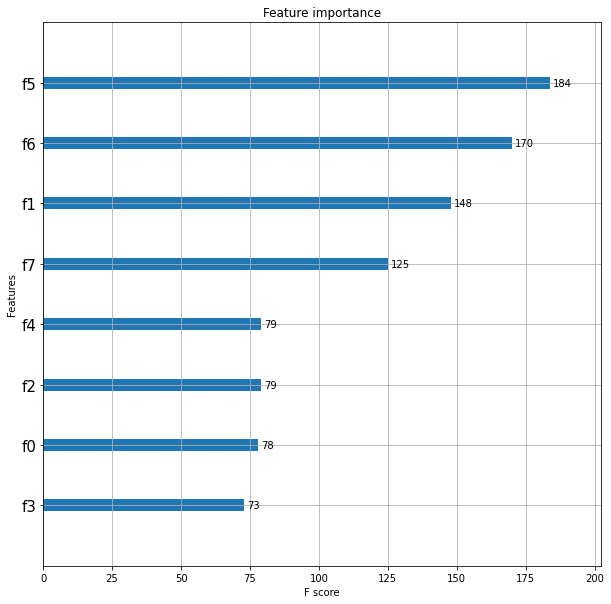

In [35]:
# 피처가 4인 트리의 의사결정 순위
model = XGBClassifier(max_depth=4) # 프루닝
model.fit(x_train, y_train)

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

- f5(당뇨병 병력 함수) 가 더 높게 측정됐다.
- 이는 트리의 깊이에 따라 의사 결정 방식과 정확도가 함께 변하기 때문이다.
- 피처 중요도가 당뇨병을 진단하는 우선순위라고 생각해선 안 되나, 피처 중요도의 순서가 진단에 영향을 미치는 정도를 구분하는 것은 맞다.

#### 부분 의존성 플롯 그리기

- 부분 의존성 플롯은 피처의 수치 변화에 따라 모델에 기여하는 정도가 어떻게 달라지는지 확인할 수 있는 XAI 기법이다.
- 궁금한 피처가 모델에 긍정적인/부정적인 영향을 미치는지 파악하게 도울 뿐만 아니라, 여유분을 표시함으로써 피처간 독립을 보장하지 못하는 환경에서 오차를 표시한다.
- 즉 피처간 독립성이 없어도 사용이 가능하다.

In [39]:
!pip install pdpbox

     |████████████████████████████████| 34.0MB 116kB/s 
     |████████████████████████████████| 13.1MB 33.8MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=5bb9b86bf81b3cf3077b64e6189ecdfd9d9bd3fd128b71b60558b218ff909092
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


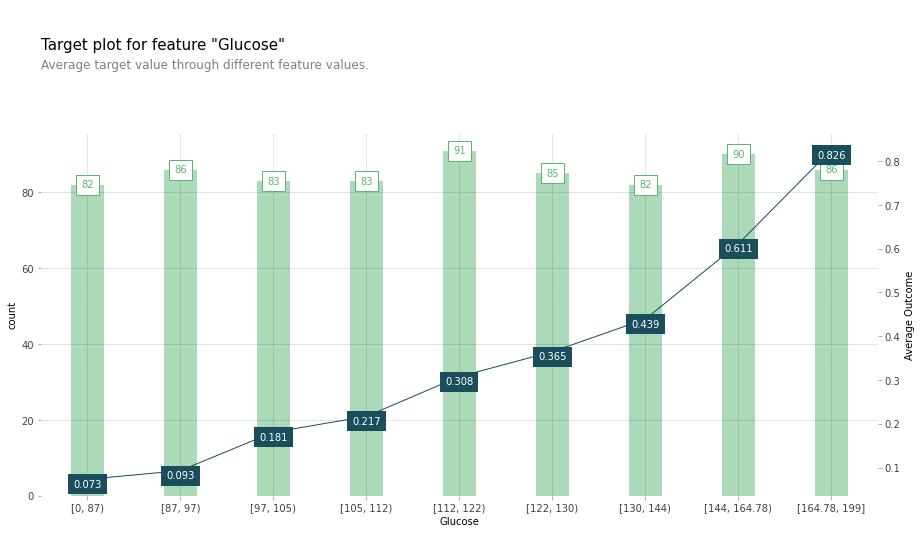

In [42]:
from pdpbox import info_plots

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/pima-indians-diabetes.csv')
pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

# plot하기

fig, axes, summary_df = info_plots.target_plot(
    df = pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

- 부분 의존성 기법은 학습된 모델을 입력값으로 받지 않는다.
- 학습데이터를 철저히 이해하면 모델이 어떻게 학습할지를 이해할 수 있다.
- 특정 데이터에 맞춰 피처가 편향되어있다면, 모델이 어떤 편향으로 학습할지 파악한다.

- x축은 GTT수치, 왼쪽 y축은 각 수치 구간별 데이터 개수, 오른쪽 y축은 당뇨병 진단 여부(>50%)이다.
- 막대 그래프는 왼쪽에, 꺾은선 그래프는 오른쪽에 대응한다.

해석

- GTT가 84mg/dL인 경우, 맨 왼쪽 막대 그래프를 확인하면 되며, 당뇨병을 진단할 확률은 7.3%이다.
- 실제 당뇨병 진단 기준 중 하나가 GTT 수치가 높다는 것이기 때문에 합리적이라고 볼 수 있다.

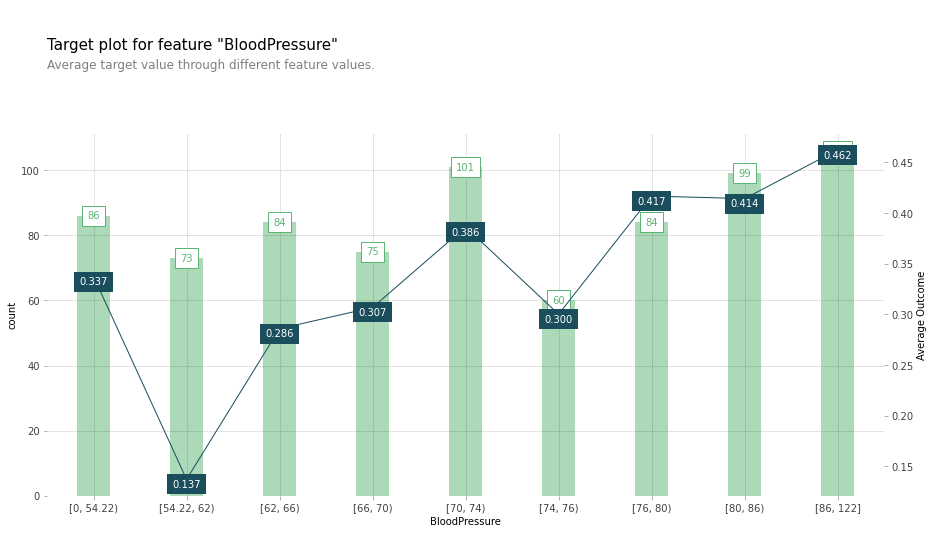

In [44]:
# 혈압에 대한 당뇨병 진단 목표 플롯
fig, axes, summary_df = info_plots.target_plot(
    df = pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target=pima_target
)

혈압에 따라서 볼 때는 선형적인 관계를 보이지 않는다. 즉 이를 가지고 판단하기에는 섣부르다고 볼 수 있다.

In [45]:
# summary_df는 그래프의 결과를 df포멧으로 저장한다
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264
